## DSC 630
### Week 1: Assignment 1.2
**Author:** Kimberly Cable<br>
**Date:** 9-03-2022

### R / Python Refresher

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**1. Write a summary of your data and identify at least two questions to explore visually with your data.**

Reference: https://www.kaggle.com/datasets/planejane/national-park-trails

This is a list of National Park trails in the United States. It shows where each trail is located, it details about the trail like length, popularity, elevation gain, difficulty rating, etc, along with things to do on the trail and number of reviews and the average rating of the trail.

Data Dictionary
* trail_id: ID of trail
* name: Name of the trail
* area_name: Which National Park the trail is located
* city_name: City where the trail is located
* state_name: State where the trail is located
* country_name: Country where the trail is located
* geoloc: latitude and longitude where the trail is located
* popularity: populatrity scale
* length: length of trail in miles
* elevation_gain: elevation gain of trail in feet
* difficulty_rating: Scale 1 to 10 on how difficult the trail is
* route_type: out and back, loop, point to point
* visitor_usage: 1 - 4: light, moderate, heavy, very heavy
* avg_rating: 1 to 5 stars - can be 1/2s
* num_reviews: number of reviews
* features: array of features
* activities: array of activities
* units: Inches or meters (i or m)

Questions I would like answered:
* Number of trails in each National Park?
* What is the popularity of a trail compared to its elevation gain?
* What are the route types per trail length?

In [2]:
# Read data file
try:
    trails_df = pd.read_csv("AllTrails data - nationalpark.csv")
except Exception:
    print("There was an error reading the Trails file")
    
trails_df.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


In [3]:
# get basic information about the columns
trails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trail_id           3313 non-null   int64  
 1   name               3313 non-null   object 
 2   area_name          3313 non-null   object 
 3   city_name          3313 non-null   object 
 4   state_name         3313 non-null   object 
 5   country_name       3313 non-null   object 
 6   _geoloc            3313 non-null   object 
 7   popularity         3313 non-null   float64
 8   length             3313 non-null   float64
 9   elevation_gain     3313 non-null   float64
 10  difficulty_rating  3313 non-null   int64  
 11  route_type         3313 non-null   object 
 12  visitor_usage      3060 non-null   float64
 13  avg_rating         3313 non-null   float64
 14  num_reviews        3313 non-null   int64  
 15  features           3313 non-null   object 
 16  activities         3313 

In [4]:
# Change Hawaii to correct state and country
trails_df['country_name'] = trails_df['country_name'].apply(lambda x: x.replace("Hawaii", "United States"))
trails_df['state_name'] = trails_df['state_name'].apply(lambda x: x.replace("Maui", "Hawaii"))

In [5]:
#Convert meters to feet for trails in Hawaii and inches to feet for others
def convert (units, length):
    """ 
    Convert meters and inches to feet
    
    Args:
        units (string): i or m
        length (float): length
        
    Returns:
        length (float): length in inches
    """
    if units == 'm':
        return length * 39.3701 * 0.08333
    else:
        return length * 0.08333

In [6]:
#Create new length column in feet
trails_df['trail_length'] = trails_df.apply(lambda x: convert(units = x['units'], length = x['length']), axis = 1)

#drop original length and units column
trails_df.drop(['length'], axis = 1, inplace = True)
trails_df.drop(['units'], axis = 1, inplace = True)

In [7]:
# drop unecessary columns
trails_df.drop(['trail_id'], axis = 1, inplace = True)

In [8]:
trails_df.head(2)

,name,area_name,city_name,state_name,country_name,_geoloc,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,trail_length
0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131
1,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099


**2. Create a histogram or bar graph from your data.**

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'elevation_gain'}>,
        <AxesSubplot:title={'center':'difficulty_rating'}>],
       [<AxesSubplot:title={'center':'visitor_usage'}>,
        <AxesSubplot:title={'center':'avg_rating'}>,
        <AxesSubplot:title={'center':'num_reviews'}>],
       [<AxesSubplot:title={'center':'trail_length'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

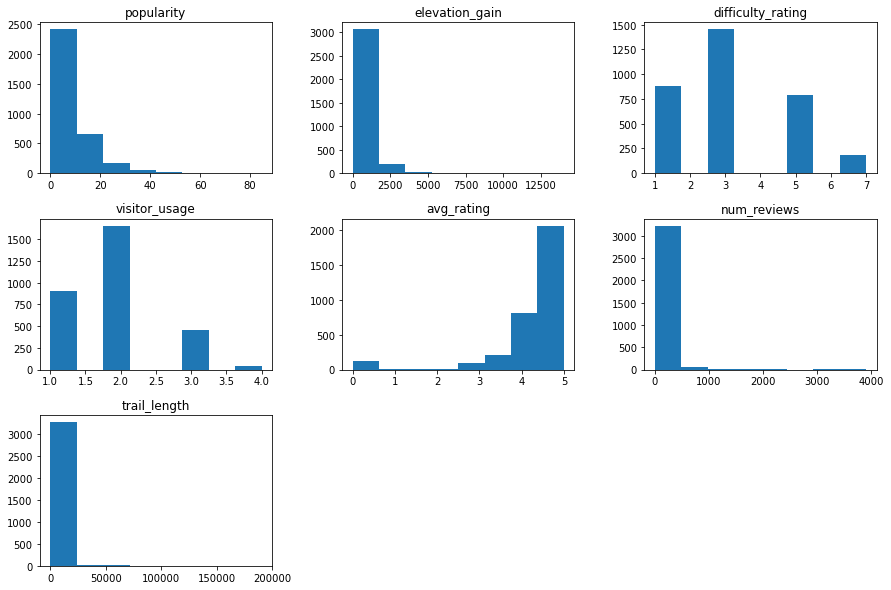

In [9]:
# Create histogram of numeric columns in dataset
trails_df.hist(bins = 8, figsize = (15, 10), grid = False)

**3. Create a boxplot from your data**

<AxesSubplot:>

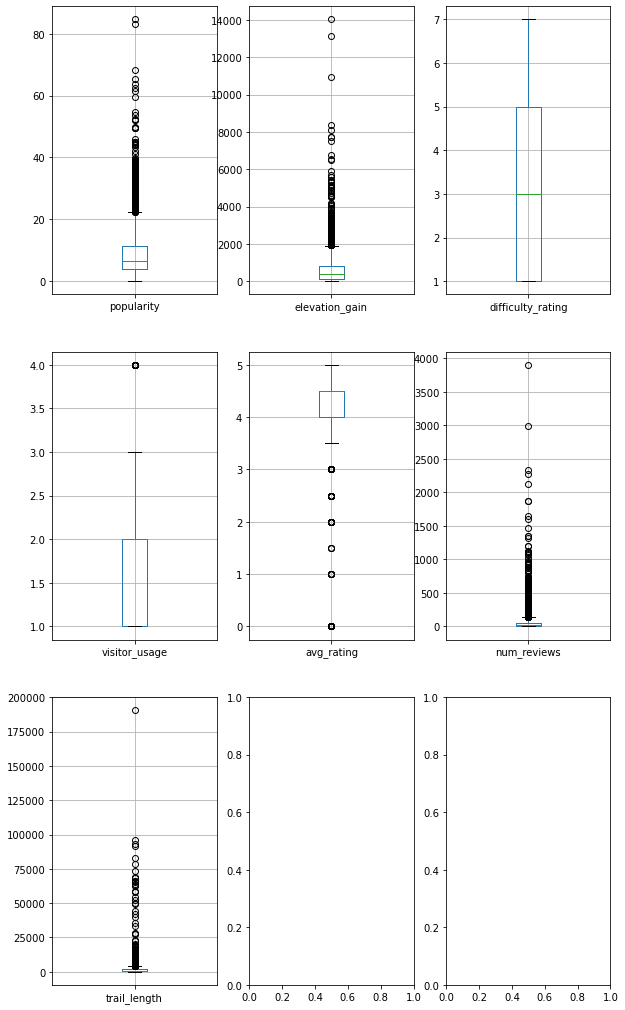

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(10, 18))

trails_df.boxplot('popularity', ax=ax[0, 0])
trails_df.boxplot('elevation_gain', ax=ax[0, 1])
trails_df.boxplot('difficulty_rating', ax=ax[0, 2])
trails_df.boxplot('visitor_usage', ax=ax[1, 0])
trails_df.boxplot('avg_rating', ax=ax[1, 1])
trails_df.boxplot('num_reviews', ax=ax[1, 2])
trails_df.boxplot('trail_length', ax=ax[2, 0])

**4. Create a bivariate plot of your data.**

##### Popularity of a trail to its Elevation Gain by Difficulty

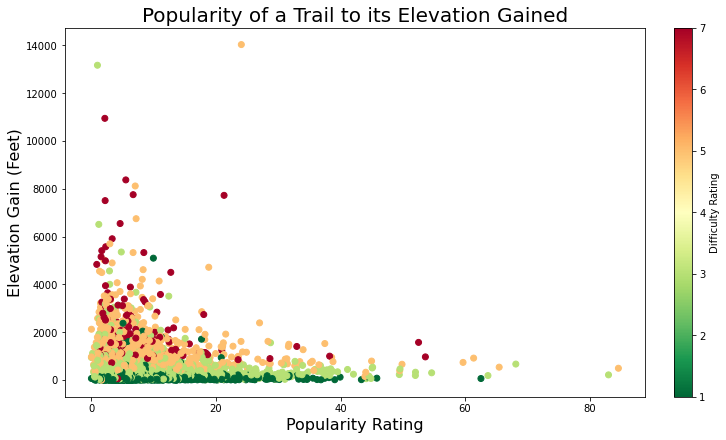

In [11]:
# Create figure
fig, ax = plt.subplots(1, 1, figsize = (10, 6), layout = 'constrained')

# Get popularity and elevation gain columns
popularity = trails_df['popularity']
difficulty = trails_df['elevation_gain']

# Group trails by difficulty rating
difficulty_grouped = trails_df.groupby('difficulty_rating')

# Create scatterplt
scatter = ax.scatter(popularity, difficulty, c = trails_df['difficulty_rating'], cmap = 'RdYlGn_r')

# Cusomize labels
ax.set_title("Popularity of a Trail to its Elevation Gained", fontsize = 20)
ax.set_xlabel("Popularity Rating", fontsize = 16)
ax.set_ylabel("Elevation Gain (Feet)", fontsize = 16)

# Create colorbar
fig.colorbar(scatter, label = 'Difficulty Rating')

**5. Create any additional visualizations that will help to answer the question(s) you want to answer.**

##### Number of Trails per Park

Text(0, 0.5, 'Number of Trails')

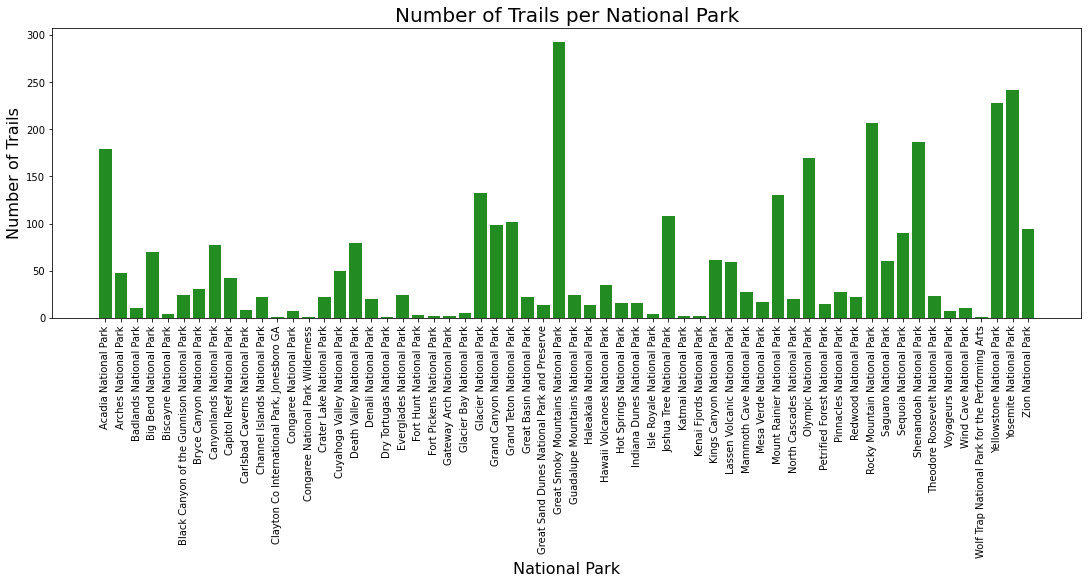

In [12]:
# Count the number of trails per National Park
by_park_count = trails_df.groupby('area_name')['name'].count()

# Split of the parks and the counts
parks = list(by_park_count.keys())
counts = list(by_park_count.values)

# Create figure
fig, ax = plt.subplots(1, 1, figsize = (15, 8), layout = 'constrained')

# Create barchart
ax.bar(parks, counts, width = .8, color = 'ForestGreen')

# Customize labels
ax.set_xticks(parks)
ax.set_xticklabels(parks, rotation = 90)
ax.set_title("Number of Trails per National Park", fontsize = 20)
ax.set_xlabel("National Park", fontsize = 16)
ax.set_ylabel("Number of Trails", fontsize = 16)

##### Length of trail per Route Type by Visitor Usage

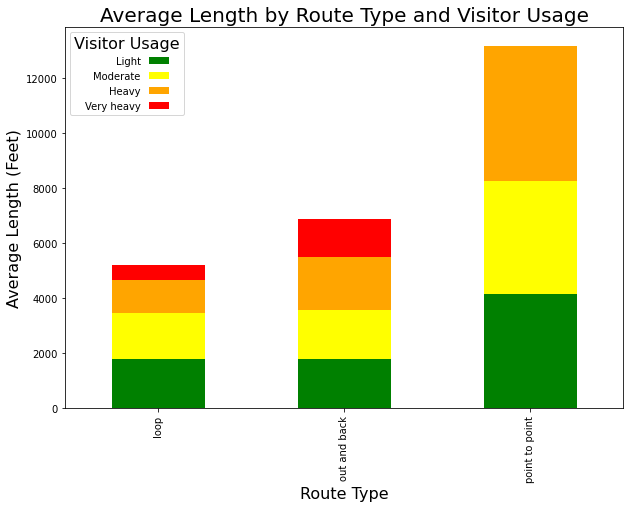

In [13]:
# Group length by route type and visitor usage
grouped_route_type = trails_df.groupby(['route_type', 'visitor_usage'])['trail_length'].mean()

# Initialize colors
colors = {1: 'green', 2:'yellow', 3:'orange', 4:'red'}

# Create stacked bar chart
ax = grouped_route_type.unstack().plot(kind = 'bar', stacked = True, figsize = (10, 7), color = colors)

# Customize labels
ax.set_xlabel('Route Type', fontsize = 16)
ax.set_ylabel('Average Length (Feet)', fontsize = 16)
ax.set_title('Average Length by Route Type and Visitor Usage', fontsize = 20)

# Customize legend
ax.legend(markerfirst = False, title = 'Visitor Usage', title_fontsize = 16, labels = ('Light', 'Moderate', 'Heavy', 'Very heavy'))

# Display chart
plt.show()

##### Popularity of trails per State

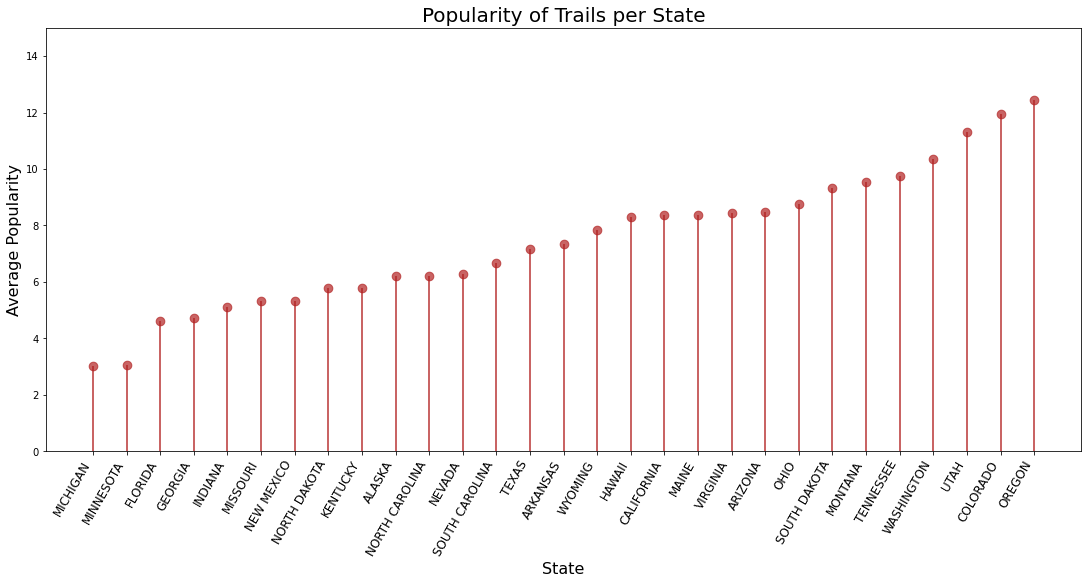

In [14]:
# Group trails by state and sort by popularity
by_popularity_state = trails_df[['popularity', 'state_name']].groupby('state_name').apply(lambda x: x.mean(numeric_only = True))
by_popularity_state.sort_values('popularity', inplace = True)
by_popularity_state.reset_index(inplace = True)

# Create figure
fig, ax = plt.subplots(figsize = (15, 8), layout = 'constrained')

# Add Vertical lines for states popularity
ax.vlines(x = by_popularity_state.index, ymin = 0, ymax = by_popularity_state.popularity, color = 'firebrick', alpha = 0.7, linewidth = 2)

# Create scatter plot for states popularity
ax.scatter(x = by_popularity_state.index, y = by_popularity_state.popularity, s = 75, color = 'firebrick', alpha = 0.7)

# Customize labels
ax.set_title("Popularity of Trails per State", fontsize = 20)
ax.set_xlabel("State", fontsize = 16)
ax.set_ylabel("Average Popularity", fontsize = 16)
ax.set_xticks(by_popularity_state.index)
ax.set_xticklabels(by_popularity_state.state_name.str.upper(), rotation = 60, fontdict={'horizontalalignment': 'right', 'size': 12})
ax.set_ylim(0, 15)

# Display chart
plt.show()

**6. Summarize your results and make a conclusion. Explain how you arrived at this conclusion and how your visualizations support your conclusion.**

Looking at the graphs, I found most people prefer shorter loops and out and back trails but the point to point does have a lot of traffic as well. Oregon trails then Colorado trails seem to be the highest in popularity. One observation that struck me as weird is the most difficult trails aren't always the ones with the highest elevation gains, though a lot were. Also noted is that the data has a lot of outliers and is right skewed. I attribute this to the nature of the data.